MOHAMED AFFAN M

# **TELECOM CUSTOMER CHURN PREDICTION**

### **Importing necessary Libraries**



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

In [7]:
import warnings
warnings.filterwarnings('ignore')


### **Importing Dataset**

In [8]:
data = pd.read_csv('Telco-Customer-Churn (1).csv')

In [9]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### **Data Cleaning and Preprocessing**

Printing 15 random data from dataset to see if there are any anomalies or missing values

In [10]:
random_sample = data.sample(n=50)
random_sample.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4823,9732-KPKBW,Male,0,No,No,1,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,53.95,53.95,Yes
6624,9888-ZCUMM,Male,0,Yes,Yes,64,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),60.05,3845.45,No
6450,4609-KNNWG,Female,0,Yes,Yes,27,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.90,550.1,No
1072,7771-ZONAT,Male,0,No,No,22,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),56.75,1304.85,No
4995,7912-SYRQT,Female,0,No,No,7,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95,Yes
1466,8205-MQUGY,Male,0,Yes,Yes,12,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,49.20,571.15,No
5070,4628-WQCQQ,Male,0,No,Yes,35,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,One year,Yes,Electronic check,85.15,3030.6,Yes
6660,1447-GIQMR,Male,0,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.15,69.15,Yes
6368,2720-WGKHP,Male,1,No,No,2,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.00,181.7,Yes
3187,7682-AZNDK,Male,0,Yes,Yes,34,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,89.85,3091.75,No


In [11]:
data.shape

(7043, 21)

Below code print the non null count and data type of features/variables

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Below code converts Total Charges into numeric data type as all the values present in that variable are numeric

In [14]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')

In [15]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

After converting Total Charges into numeric data type we found there are 11 missing values

As there are only very little amount of missing values we drop the missing values

In [16]:
data.dropna(inplace=True)

We also drop customer ID column as it is not important feature for us

In [17]:
data.drop(columns='customerID', inplace=True)

Senior Citizen column contain 0 & 1 instead of Yes/No. Converting it into Yes/No for better understandability

In [18]:
print(data['SeniorCitizen'].unique())


[0 1]


In [19]:
data['SeniorCitizen'] = data['SeniorCitizen'].map({0: "No", 1: "Yes"})
data['SeniorCitizen'].head()

0    No
1    No
2    No
3    No
4    No
Name: SeniorCitizen, dtype: object

Printing all the unique values from all the features present in our dataset

In [20]:
cols = data.columns
for i in cols:
 print(i, data[i].unique(), '\n')

gender ['Female' 'Male'] 

SeniorCitizen ['No' 'Yes'] 

Partner ['Yes' 'No'] 

Dependents ['No' 'Yes'] 

tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 

PhoneService ['No' 'Yes'] 

MultipleLines ['No phone service' 'No' 'Yes'] 

InternetService ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity ['No' 'Yes' 'No internet service'] 

OnlineBackup ['Yes' 'No' 'No internet service'] 

DeviceProtection ['No' 'Yes' 'No internet service'] 

TechSupport ['No' 'Yes' 'No internet service'] 

StreamingTV ['No' 'Yes' 'No internet service'] 

StreamingMovies ['No' 'Yes' 'No internet service'] 

Contract ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling ['Yes' 'No'] 

PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.

Below code performs the descriptive statistics for the numeric columns

In [21]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


It is clearly obvious looking at the distribution above that our data has no outliers. The quantity is gradually increasing.

### **Data Visualization**

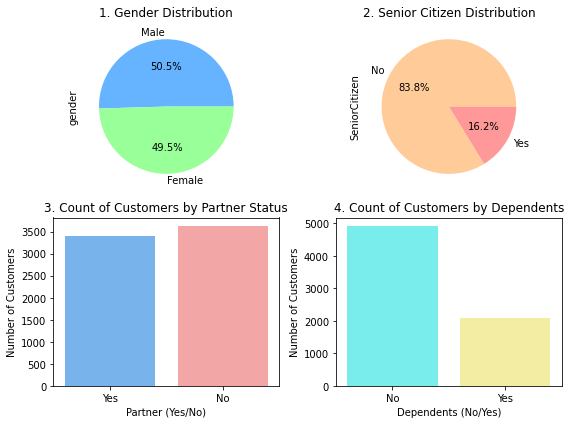

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6))
# 1. Gender Distribution
data['gender'].value_counts().plot.pie(ax=ax[0, 0], autopct='%1.1f%%',
                                       colors=['#66b3ff','#99ff99'])
ax[0, 0].set_title('1. Gender Distribution')
# 2. Senior Citizen Distribution
data['SeniorCitizen'].value_counts().plot.pie(
    ax=ax[0, 1], autopct='%1.1f%%',colors=['#ffcc99','#ff9999'],
    labels=['No', 'Yes'])
ax[0, 1].set_title('2. Senior Citizen Distribution')
# 3. Count of Customers by Partner Status
sns.countplot(x='Partner', data=data, palette=['#66b3ff', '#ff9999'],
              ax=ax[1, 0])
ax[1, 0].set_title('3. Count of Customers by Partner Status')
ax[1, 0].set_xlabel('Partner (Yes/No)')
ax[1, 0].set_ylabel('Number of Customers')
# 4. Count of Customers by Dependents
sns.countplot(x='Dependents', data=data, palette=['#66ffff', '#fff996'],
              ax=ax[1, 1])
ax[1, 1].set_title('4. Count of Customers by Dependents')
ax[1, 1].set_xlabel('Dependents (No/Yes)')
ax[1, 1].set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()


OBSERVATIONS:

*   Plot 1 : Male and female ratio is equal in our dataset
*   Plot 2 : There are only 16% senior citizen in our dataset and rest are young.

*   Plot 3 : From our graph above we can see that around then 3500 customers have partners and similar count don't have partner.
*   Plot 4: From our graph we can see that less then half of the customers don't have dependents.





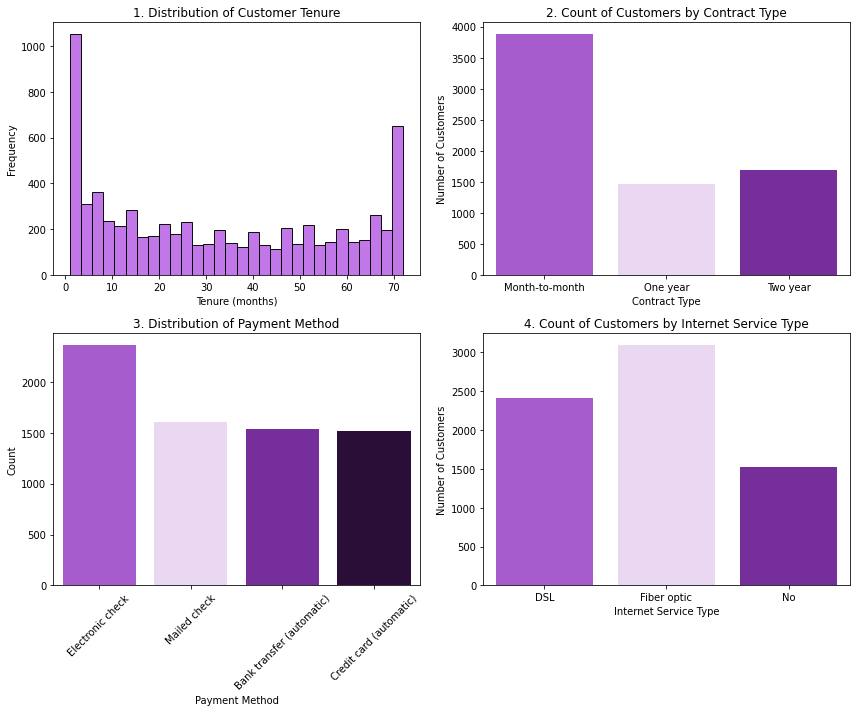

In [23]:

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

#1. Distribution of Customer Tenure
sns.histplot(data['tenure'], bins=30,color='#AD49E1', ax=ax[0, 0])
ax[0, 0].set_title('1. Distribution of Customer Tenure')
ax[0, 0].set_xlabel('Tenure (months)')
ax[0, 0].set_ylabel('Frequency')
# 2. Count of Customers by Contract Type
sns.countplot(x='Contract', data=data, palette=['#AD49E1','#EBD3F8','#7A1CAC'],
              ax=ax[0, 1])
ax[0, 1].set_title('2. Count of Customers by Contract Type')
ax[0, 1].set_xlabel('Contract Type')
ax[0, 1].set_ylabel('Number of Customers')
#3. Distribution of Payment Method
sns.countplot(x='PaymentMethod', data=data,
              palette=['#AD49E1','#EBD3F8','#7A1CAC','#2E073F'], ax=ax[1, 0])
ax[1, 0].set_title('3. Distribution of Payment Method')
ax[1, 0].set_xlabel('Payment Method')
ax[1, 0].set_ylabel('Count')
ax[1, 0].tick_params(axis='x', rotation=45)
#4. Count of Customers by Internet Service Type
sns.countplot(x='InternetService', data=data,
              palette=['#AD49E1','#EBD3F8','#7A1CAC'], ax=ax[1, 1])
ax[1, 1].set_title('4. Count of Customers by Internet Service Type')
ax[1, 1].set_xlabel('Internet Service Type')
ax[1, 1].set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()


OBSERVATIONS:


*   Plot 1 : From the histogram above we can see most of the customers had tenure of month or two and few have tenure of more then 70 months.
*   Plot 2 : The graph shows around 4000 customers opted for month-to-month contact and they are have the highest chance of getting churned.

*   Plot 3 : More then 2000 customer prefer electronic check and significant amount of customers prefer other payment options provided by the company.
*   Plot 4 : DSL(Digital Subscriber Line) and fiber optic are the two internet service provided by the company and most of them use fiber optic connection.





### **Data Visualization with respect to Churn**

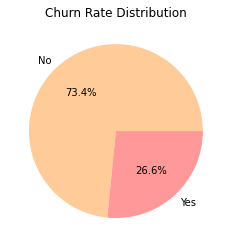

In [24]:
plt.pie(x = data['Churn'].value_counts(), labels = data['Churn'].unique(),
        autopct='%1.1f%%', colors=['#ffcc99','#ff9999'])
plt.title('Churn Rate Distribution')
plt.show()

OBSERVATION:
Above pie chart shows the churn rate of the customer from the company.Only 26% customers got churned which shows good hold of customers by the company.

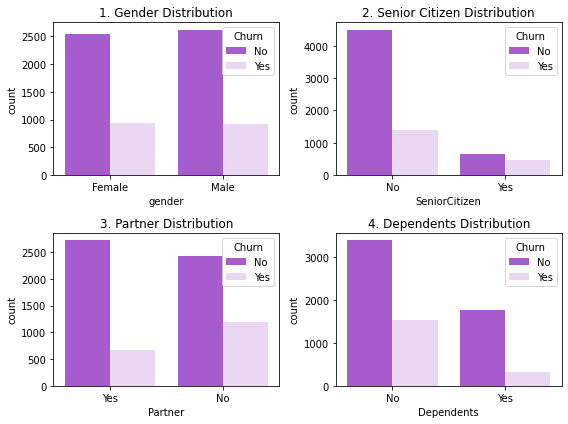

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6))

#1. Gender Distribution & Churn
sns.countplot(x='gender', data=data, hue='Churn', ax=ax[0, 0],
              palette=['#AD49E1','#EBD3F8'])
ax[0, 0].set_title('1. Gender Distribution')
#2. Senior Citizen Distribution & Churn
sns.countplot(x='SeniorCitizen', data=data, hue='Churn', ax=ax[0, 1],
              palette=['#AD49E1','#EBD3F8'])
ax[0, 1].set_title('2. Senior Citizen Distribution')
#3. Partner Distribution & Churn
sns.countplot(x='Partner', data=data, hue='Churn', ax=ax[1, 0],
              palette=['#AD49E1','#EBD3F8'])
ax[1, 0].set_title('3. Partner Distribution')
#4. Dependents Distribution & Churn
sns.countplot(x='Dependents', data=data, hue='Churn', ax=ax[1, 1],
              palette=['#AD49E1','#EBD3F8'])
ax[1,1].set_title('4. Dependents Distribution')

plt.tight_layout()
plt.show()


OBSERVATIONS:

*   Plot 1 : From the Graph above we can see that equal number of male and female customer got churned, which shows gender is not the reason of seperation from the company.
*   Plot 2 : Graph shows senior citizen have less churn rate compared to young customers.



*   Plot 3 : Customers with no partners have a higher churn rate. This shows that having a partner might be one of the reason for customers to stay with the company.

*   Plot 4 : Customers with no dependents tend to have a higher churn rate compared to those who have dependents. Dependents may be the reason to stay with company for longer period.



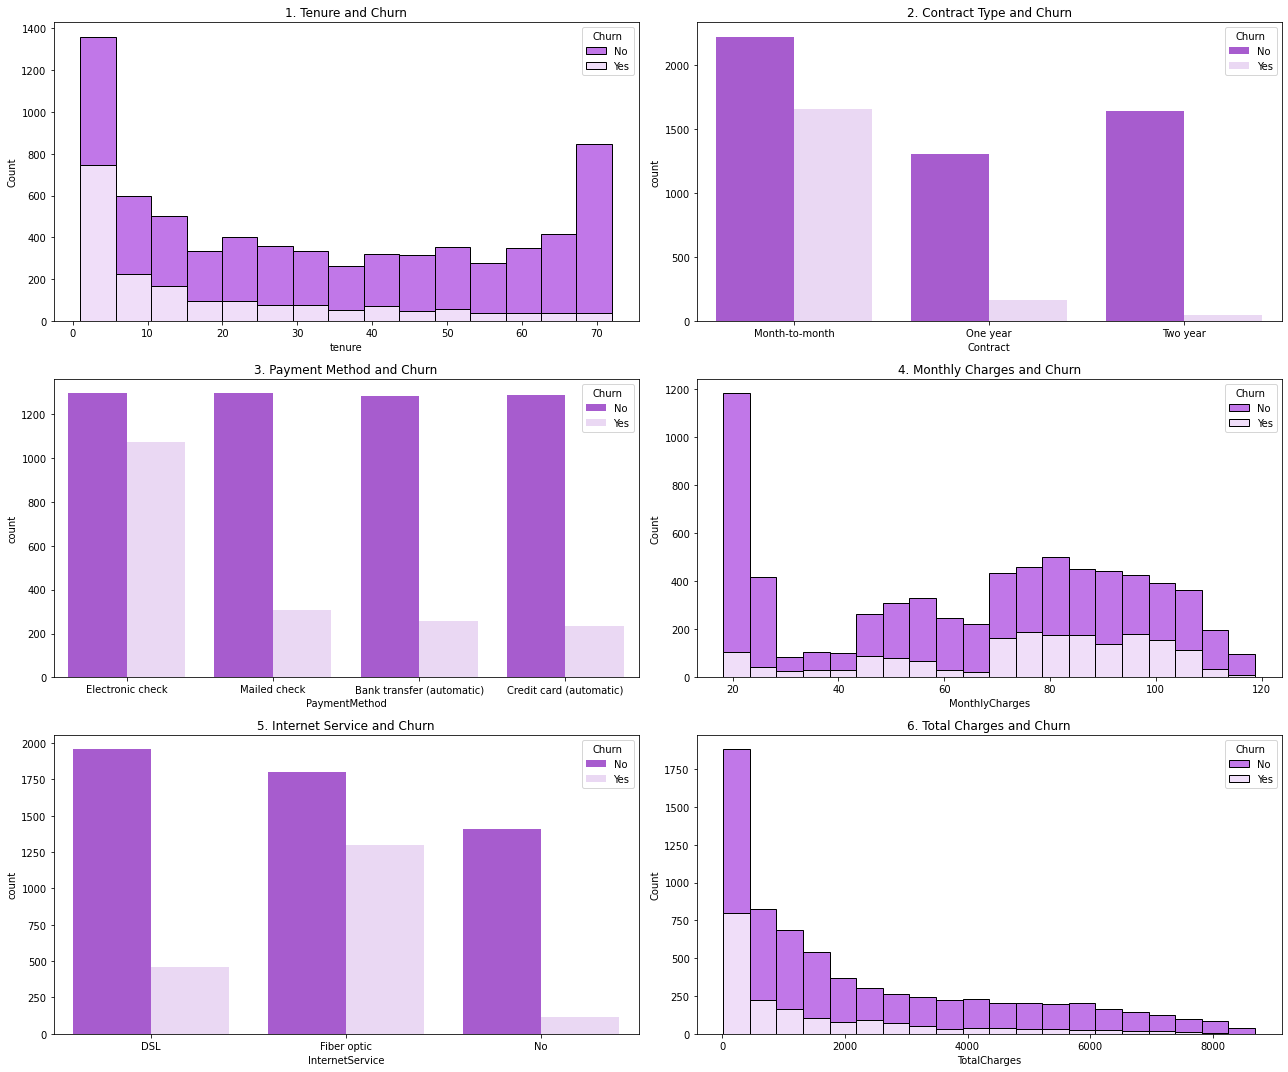

In [26]:
fig, ax = plt.subplots(3, 2, figsize=(18, 15))

#1. Tenure Distribution & Churn
sns.histplot(x='tenure', data=data, ax=ax[0,0], hue='Churn',
             multiple='stack',palette=['#AD49E1','#EBD3F8'])
ax[0,0].set_title('1. Tenure and Churn')
# Contract Type & Churn
sns.countplot(x='Contract', data=data, hue='Churn',
              ax=ax[0, 1],palette=['#AD49E1','#EBD3F8'])
ax[0, 1].set_title('2. Contract Type and Churn')
# Payment Method & Churn
sns.countplot(x='PaymentMethod', data=data, hue='Churn',
              ax=ax[1, 0],palette=['#AD49E1','#EBD3F8'])
ax[1, 0].set_title('3. Payment Method and Churn')
# Monthly Charges & Churn
sns.histplot(data=data, x='MonthlyCharges', bins=20, hue='Churn',
             ax=ax[1, 1],multiple = 'stack',palette=['#AD49E1','#EBD3F8'])
ax[1, 1].set_title('4. Monthly Charges and Churn')
# Internet Service & Churn
sns.countplot(x='InternetService', data=data, hue='Churn',ax=ax[2, 0],
              palette=['#AD49E1','#EBD3F8'])
ax[2, 0].set_title('5. Internet Service and Churn')
# Total Charges & Churn
sns.histplot(data=data, x='TotalCharges', bins=20,
             hue='Churn',ax=ax[2, 1], multiple = 'stack',
             palette=['#AD49E1','#EBD3F8'])
ax[2, 1].set_title('6. Total Charges and Churn')

plt.tight_layout()
plt.show()


OBSERVATIONS:



*   Plot 1 : Customer tenure and contract has a inverse relation. The customers with shorter tenure or tenure less than 5 months have higher churn rate. The churn rate decreases with increase in tenure.
*   Plot 2 : Customers with Month-to-Month contracts shows a higher churn rate compared to those with longer-term contracts. So the company should emphasize customer on choosing longer-term contracts to reduce churn rate.
*   Plot 3 : Customers with Fiber Optic connection have the highest churn rate, indicating a possible dissatisfaction among Fiber Optic users leading to churn.


*   Plot 4 : monthly charges above $70 have higher churn rate, which indicates price may be the factor of increasing churn rate.


*   Plot 5 : Customers using Electronic Check as their payment method have a higher churn rate compared to those using Mailed Check, Bank Transfer or Credit Card.




*   Plot 6 : There is a higher churn rate among customers in the lower total charges range. As total charges increase, the frequency of churn decreases, which is surprising.




In [27]:
# from scipy import stats
# numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
# z_score = data[numerical_columns].apply(stats.zscore)
# outliers = (z_score.abs() > 3).sum()
# print("No of outliers in each column:")
# print(outliers)


### **Feature Engineering**

Below is the code for Standardization.We use this standardization for numeric features

In [28]:
scaler = StandardScaler()
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

One hot encoding for features with more then 2 values

In [29]:
features_ohe = ["MultipleLines","InternetService","OnlineSecurity",
                "OnlineBackup","DeviceProtection","TechSupport",
                "StreamingTV","StreamingMovies","Contract","PaymentMethod"]
data = pd.get_dummies(data, columns=features_ohe)

For categorical features with only 2 values we use label encoding

In [30]:
categorical_cols = data.select_dtypes(include=['object']).columns
le_encode = [col for col in categorical_cols if col not in features_ohe]
le = LabelEncoder()
for col in le_encode:
    data[col] = le.fit_transform(data[col])
    #print(f"{col}: {data[col].unique()}\n")

### **Correlation matrix**

In [31]:
# plt.figure(figsize=(25, 15))
# sns.heatmap(data.corr(), annot=True,cmap='coolwarm')
# plt.show()


Correlation with respect to Churn

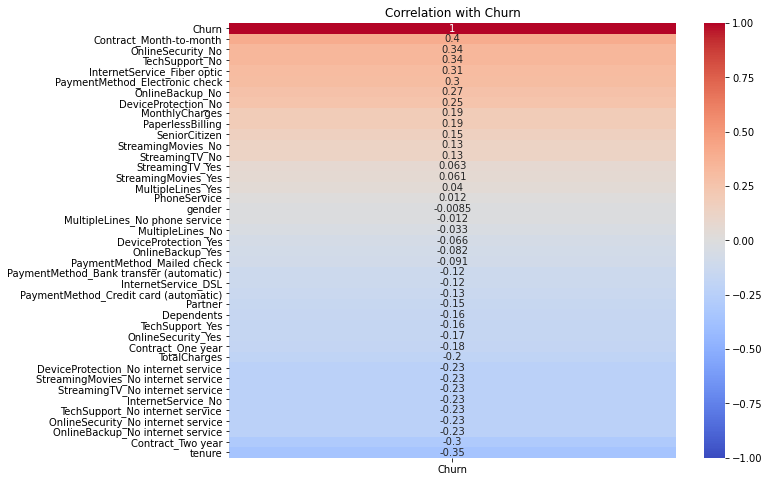

In [32]:
corr_matrix = data.corr()
churn_corr = corr_matrix[['Churn']].sort_values(by='Churn', ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(churn_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Churn')
plt.show()

OBSERVATION:
* The highest correlation is the Contract_Month-to-month variable, so Contract_Month-to-month has higher churn rate.
* Tenure is has a maximum negative correlation with churn, so higher values from tenure will have a lower churn rate.

### **Preparing the data for Model Building**

In [33]:
X = data.drop('Churn', axis=1)
y = data['Churn']
# Split the data into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

Random Forest Algorithm

Here we use Random forest algorithm because it handles both categorical and numerical features well. It also provides feature importance, which helps in understanding which features are most important in predicting churn.

In [34]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
y_pred = rf_model.predict(X_test)

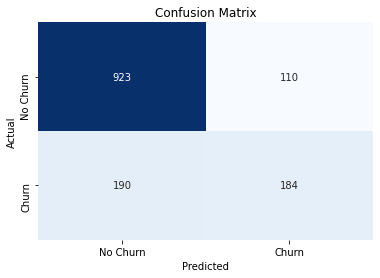

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [36]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
          xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred))

OBSERVATION:
Accuracy of Random Forest model is 79%

<AxesSubplot:>

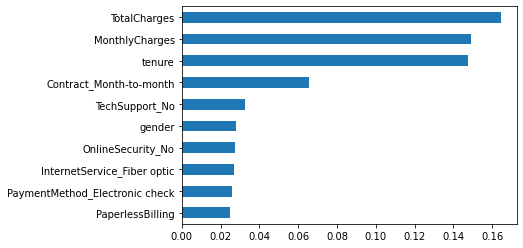

In [37]:
# Get feature importances
importances = rf_model.feature_importances_
weights = pd.Series(importances, index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

OBSERVATION: Above graph shows the top 10 important predictor variables to predict churn.The most important factors in predicting churn in this model are the Total Charges, Monthly Charges, customer tenure, and month to month contract they are on

SUPPORT VECTOR MACHINE CLASSIFICATION

SVM is a powerful for classification algorithm. Here i use SVM because of its ability to handle large dataset well also SVM model is useful for binary classification like churn prediction.

In [38]:
svm_model = SVC(random_state=1)
svm_model.fit(X_train, y_train)

SVC(random_state=1)

In [39]:
y_pred = svm_model.predict(X_test)

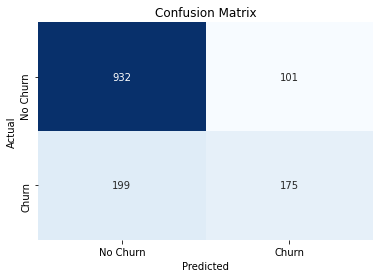

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



In [40]:
# Evaluate the model performance
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', cbar=False,
            xticklabels=['No Churn', 'Churn'],yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred))


OBSERVATION:
Accuracy of Support vector classification model is 79%

Predict for single Instance

In [41]:
churn_labels = ['No', 'Yes']
prediction = churn_labels[y_pred[1333]]
prediction

'Yes'

CONCLUSION:
* In our Customer Churn Prediction project, we aimed to identify the types of customers most likely to churn using the Telecom Customer Churn dataset. Here we used two machine learning models Random Forest and Support Vector Machine (SVM) and compared its accuracy. Both models performed equally with 79% though SVM model slighly performed better in predicting correctly. One of reasons for models low performance is due to imbalance data, in our dataset chruned customers are less compared to customers who stay. To imporve our models performance we can use hyper parameter tuning or perform prediction on balanced dataset.
* With correlation matrix graph i was able to see which customer type are at high risk of churn
customers on month-to-month contracts are more likely to churn compared to those with one-year or two-year contracts, meaning that short-term contracts come with a higher risk of losing customers. Customers without online security or tech support are more likely to churn, showing that the absence of these services increases the risk of churn. Customers with shorter tenure using the service, are also more likely to churn. Additionally, customers who have less total charge are more likely to churn, possibly because they don't enough service or facilities in their package.
* Some of the recommandation to reduce churn rate is to provide targeted Offers for Low-Spending Customers, improved services for low spending customers and improved marketing stategies.